"""<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">

<h3 align="left"><font color='#4E5672'>Features</font></h3>

* X_Minimum: Tọa độ x tối thiểu của hộp giới hạn của lỗi.

* X_Maximum: Tọa độ x tối đa của hộp giới hạn của lỗi.

* Y_Minimum: Tọa độ y tối thiểu của hộp giới hạn của lỗi.

* Y_Maximum: Tọa độ y tối đa của hộp giới hạn của lỗi.

* Pixels_Areas: Tổng số pixel trong vùng bị lỗi.

* X_Perimeter: Chu vi của khuyết tật theo phương x.

* Y_Perimeter: Chu vi của khuyết tật theo phương y.

* Sum_of_Luminosity: Tổng giá trị độ sáng trong vùng khuyết tật.

* Minimum_of_Luminosity: Giá trị độ sáng tối thiểu trong vùng khuyết tật.

* Maximum_of_Luminosity: Giá trị độ sáng tối đa trong vùng khuyết tật.

* Length_of_Conveyer: Chiều dài của băng tải nơi phát hiện lỗi.

* TypeOfSteel_A300: Chỉ báo nhị phân cho loại thép A300.

* TypeOfSteel_A400: Chỉ báo nhị phân cho loại thép A400.

* Steel_Plate_Thickness: Độ dày của tấm thép.

* Edges_Index: Chỉ số biểu thị tỷ lệ giữa tổng chiều dài các cạnh với chu vi.

* Empty_Index: Chỉ số biểu thị tỷ lệ khoảng trống so với vùng bị lỗi.

* Square_Index: Chỉ số biểu thị tỉ lệ giữa bình phương chu vi và diện tích khuyết tật.

* Outside_X_Index: Chỉ số biểu thị tỷ lệ số lượng đường viền ngoài với diện tích khuyết tật theo phương x.

* Edges_X_Index: Chỉ số biểu thị tỷ lệ số cạnh theo hướng x so với vùng khuyết tật.

* Edges_Y_Index: Chỉ số biểu thị tỷ lệ số cạnh theo phương y với vùng khuyết tật.

* Outside_Global_Index: Chỉ số biểu thị tỷ lệ số lượng đường viền bên ngoài so với diện tích khuyết tật trên toàn cầu.

* LogOfAreas: Logarit của vùng khuyết tật.

* Log_X_Index: Chỉ số biểu thị tỷ lệ logarit của vùng khuyết tật với chiều dài khuyết tật theo hướng x.

* Log_Y_Index: Chỉ số biểu thị tỷ lệ logarit của vùng khuyết tật với chiều dài khuyết tật theo hướng y.

* Orientation_Index: Chỉ số biểu thị hướng của khuyết tật.

* Luminosity_Index: Chỉ số biểu thị độ sáng của khuyết tật.

* SigmoidOfAreas: Phép biến đổi sigmoid của vùng khuyết tật.
    
<h3 align="left"><font color='#4E5672'>Mục tiêu</font></h3>
    
* Pastry: Chỉ báo nhị phân cho sự hiện diện của lỗi bánh ngọt.

* Z_Scratch: Chỉ báo nhị phân cho sự hiện diện của lỗi vết xước Z.

* K_Scatch: Chỉ báo nhị phân cho sự hiện diện của lỗi vết xước K.

* Stains: Chỉ báo nhị phân cho sự hiện diện của vết bẩn.

* Dirtiness: Chỉ báo nhị phân cho sự hiện diện của độ bẩn.

* Bumps: Chỉ báo nhị phân cho sự hiện diện của các vết sưng.

* Other_Faults: Chỉ báo nhị phân cho sự hiện diện của các lỗi khác.\


In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(transform_output='pandas')

from colorama import Fore, Style
def PrintColor(text: str, color=Fore.RED, style=Style.BRIGHT):
    print(style+color+text+Style.RESET_ALL)

In [2]:
from category_encoders import (OrdinalEncoder, OneHotEncoder,
                               TargetEncoder, CountEncoder)

from sklearn.preprocessing import (MinMaxScaler, StandardScaler,
                                   RobustScaler, PowerTransformer)

from sklearn.model_selection import (cross_val_score, RepeatedKFold, cross_val_predict,
                                     RepeatedStratifiedKFold, StratifiedGroupKFold,
                                     StratifiedKFold, KFold, cross_validate,
                                     GridSearchCV, RandomizedSearchCV)

from sklearn.metrics import (accuracy_score, roc_auc_score, 
                             precision_recall_curve, f1_score,
                             make_scorer)

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.multioutput import MultiOutputClassifier
import optuna

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [3]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
plt.style.use('ggplot')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
cm = sns.color_palette("light:b", as_cmap=True)

In [4]:
class Cfg:
    
    # Flags
    train_and_orig = True                      # Combine competition train and originaldata
    automl_enabled = False                     # Use autogluon
    perform_adversarial_validation = True      # Check whether train and test come from one distribution
    scale_data = True
    scaling_type = 'RobustScaler'
    
    # Data
    train = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv', index_col=0)    
    test = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv', index_col=0)
    orig = pd.read_csv('/kaggle/input/playgrounds4e03ancillary/PlaygroundS4E3Original.csv', index_col=0)
    sample = pd.read_csv('/kaggle/input/playground-series-s4e3/sample_submission.csv')
    test.name = 'Test'
    orig.name = 'Original'
    
    # Train and original dataset concatenation
    if train_and_orig:
        train = pd.concat([train, orig], axis=0)
        
    for df in [train, test, orig]:
        df.columns = df.columns.str.replace(r"\(|\)|\s+","", regex=True)
    
    targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
    targets_bin = train[targets]
    train = train.drop(targets, axis=1)
    train.name = 'Train'
    
    state = 42

In [5]:
for df in [Cfg.train, Cfg.test, Cfg.orig]:
    print(f'{df.name} dataframe shape: {df.shape}')

Train dataframe shape: (21160, 27)
Test dataframe shape: (12814, 27)
Original dataframe shape: (1941, 34)


In [6]:
PrintColor(f'\n Train info', color=Fore.RED)
Cfg.train.info()

PrintColor(f'\n Test info', color=Fore.RED)
Cfg.test.info()

PrintColor(f'\n Original dataset info', color=Fore.RED)
Cfg.orig.info()


 Train info
<class 'pandas.core.frame.DataFrame'>
Index: 21160 entries, 0 to 1941
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              21160 non-null  int64  
 1   X_Maximum              21160 non-null  int64  
 2   Y_Minimum              21160 non-null  int64  
 3   Y_Maximum              21160 non-null  int64  
 4   Pixels_Areas           21160 non-null  int64  
 5   X_Perimeter            21160 non-null  int64  
 6   Y_Perimeter            21160 non-null  int64  
 7   Sum_of_Luminosity      21160 non-null  int64  
 8   Minimum_of_Luminosity  21160 non-null  int64  
 9   Maximum_of_Luminosity  21160 non-null  int64  
 10  Length_of_Conveyer     21160 non-null  int64  
 11  TypeOfSteel_A300       21160 non-null  int64  
 12  TypeOfSteel_A400       21160 non-null  int64  
 13  Steel_Plate_Thickness  21160 non-null  int64  
 14  Edges_Index            21160 non-null  float64


In [7]:
PrintColor(f'\n Train head', color=Fore.RED)
display(Cfg.train.head())

PrintColor(f'\n Test head', color=Fore.RED)
display(Cfg.test.head())

PrintColor(f'\n Original dataset head', color=Fore.RED)
display(Cfg.orig.head())


 Train head


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998



 Test head


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
19222,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
19223,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170



 Original dataset head


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
2,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
3,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
4,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
5,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [8]:
PrintColor(f'\n Train descriptive statistics', color=Fore.RED)
display(Cfg.train.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T \
                 .drop('count', axis=1).style.background_gradient(cmap=cm, axis=1) \
                                             .format(precision=5))

PrintColor(f'\n Test descriptive statistics', color=Fore.RED)
display(Cfg.test.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T \
                .drop('count', axis=1).style.background_gradient(cmap=cm, axis=1) \
                                             .format(precision=5))

PrintColor(f'\n Original dataset descriptive statistics', color=Fore.RED)
display(Cfg.orig.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T \
                .drop('count', axis=1).style.background_gradient(cmap=cm, axis=1) \
                                             .format(precision=5))


 Train descriptive statistics


,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
X_Minimum,697.13006,532.05457,0.00000,0.00000,14.00000,50.00000,754.00000,1145.00000,1579.00000,1673.00000,1705.00000
X_Maximum,741.39220,501.16009,4.00000,12.00000,27.00000,214.00000,772.00000,1161.00000,1592.00000,1684.00000,1713.00000
Y_Minimum,1831495.30539,1892921.74627,6712.00000,31041.00000,96615.00000,639490.00000,1378585.00000,2339627.00000,5303273.00000,10391495.00000,12987661.00000
Y_Maximum,1828638.56148,1886265.96340,6724.00000,30721.80000,96658.00000,639507.00000,1378261.00000,2336466.25000,5303295.00000,10391507.00000,12987692.00000
Pixels_Areas,1703.24083,3884.80085,2.00000,16.00000,50.00000,88.00000,169.00000,659.00000,9927.00000,16220.00000,152655.00000
X_Perimeter,97.14074,192.51001,2.00000,6.00000,9.00000,15.00000,25.00000,67.00000,587.00000,796.00000,10449.00000
Y_Perimeter,65.85246,161.18757,1.00000,4.00000,7.00000,14.00000,24.00000,62.00000,359.00000,497.00000,18152.00000
Sum_of_Luminosity,193173.59112,448934.78632,250.00000,1961.00000,4664.00000,9778.00000,18402.00000,68416.00000,1245114.00000,1937439.02000,11591414.00000
Minimum_of_Luminosity,84.78459,29.12134,0.00000,23.00000,35.00000,68.00000,90.00000,105.00000,120.00000,157.41000,203.00000
Maximum_of_Luminosity,128.78922,14.67294,37.00000,87.00000,108.00000,124.00000,127.00000,135.00000,143.00000,182.41000,253.00000



 Test descriptive statistics


,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
X_Minimum,709.33136,531.87851,0.00000,0.00000,13.00000,46.00000,776.00000,1152.00000,1575.00000,1673.00000,1688.00000
X_Maximum,753.27493,500.74357,4.00000,12.00000,24.00000,214.00000,796.00000,1167.00000,1590.00000,1684.00000,1712.00000
Y_Minimum,1846533.45934,1916427.38978,6712.00000,31146.00000,96205.00000,640173.75000,1378890.50000,2368032.00000,5437033.00000,10391495.00000,12987661.00000
Y_Maximum,1842029.49423,1911425.61105,6724.00000,30358.38000,96225.00000,639857.00000,1378588.00000,2356237.50000,5437060.00000,10391507.00000,12987692.00000
Pixels_Areas,1672.90823,3725.51900,4.00000,16.00000,51.00000,91.00000,169.00000,649.00000,8709.00000,15896.00000,152655.00000
X_Perimeter,96.45950,219.92855,2.00000,6.00000,9.00000,15.00000,24.00000,64.00000,577.35000,796.00000,10449.00000
Y_Perimeter,64.73061,188.50639,2.00000,4.00000,7.00000,14.00000,24.00000,60.00000,355.00000,480.00000,18152.00000
Sum_of_Luminosity,192689.29913,481287.14701,535.00000,1961.00000,4712.00000,9968.00000,18402.00000,66960.25000,1095823.75000,1877827.00000,11591414.00000
Minimum_of_Luminosity,84.54807,28.71157,0.00000,23.00000,36.00000,68.00000,90.00000,105.00000,120.00000,150.00000,203.00000
Maximum_of_Luminosity,128.68886,14.28099,37.00000,93.00000,108.00000,124.00000,127.00000,135.00000,143.00000,182.00000,253.00000



 Original dataset descriptive statistics


,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
X_Minimum,571.13601,520.69067,0.00000,0.00000,14.00000,51.00000,435.00000,1053.00000,1538.00000,1654.80000,1705.00000
X_Maximum,617.96445,497.62741,4.00000,13.00000,29.00000,192.00000,467.00000,1072.00000,1561.00000,1675.40000,1713.00000
Y_Minimum,1650684.86811,1774578.41473,6712.00000,28533.00000,86773.00000,471253.00000,1204128.00000,2183073.00000,4532922.00000,10359325.20000,12987661.00000
Y_Maximum,1650738.70531,1774590.08900,6724.00000,28546.40000,86815.00000,471281.00000,1204136.00000,2183084.00000,4532948.00000,10359343.20000,12987692.00000
Pixels_Areas,1893.87841,5168.45956,2.00000,12.80000,39.00000,84.00000,174.00000,822.00000,11211.00000,18033.40000,152655.00000
X_Perimeter,111.85523,301.20919,2.00000,5.40000,9.00000,15.00000,26.00000,84.00000,616.00000,863.40000,10449.00000
Y_Perimeter,82.96600,426.48288,1.00000,4.00000,7.00000,13.00000,25.00000,83.00000,381.00000,539.00000,18152.00000
Sum_of_Luminosity,206312.14786,512293.58761,250.00000,1551.00000,4347.00000,9522.00000,19202.00000,83011.00000,1293558.00000,2155800.80000,11591414.00000
Minimum_of_Luminosity,84.54869,32.13428,0.00000,19.00000,29.00000,63.00000,90.00000,106.00000,124.00000,170.80000,203.00000
Maximum_of_Luminosity,130.19371,18.69099,37.00000,84.00000,102.00000,124.00000,127.00000,140.00000,156.00000,199.00000,253.00000


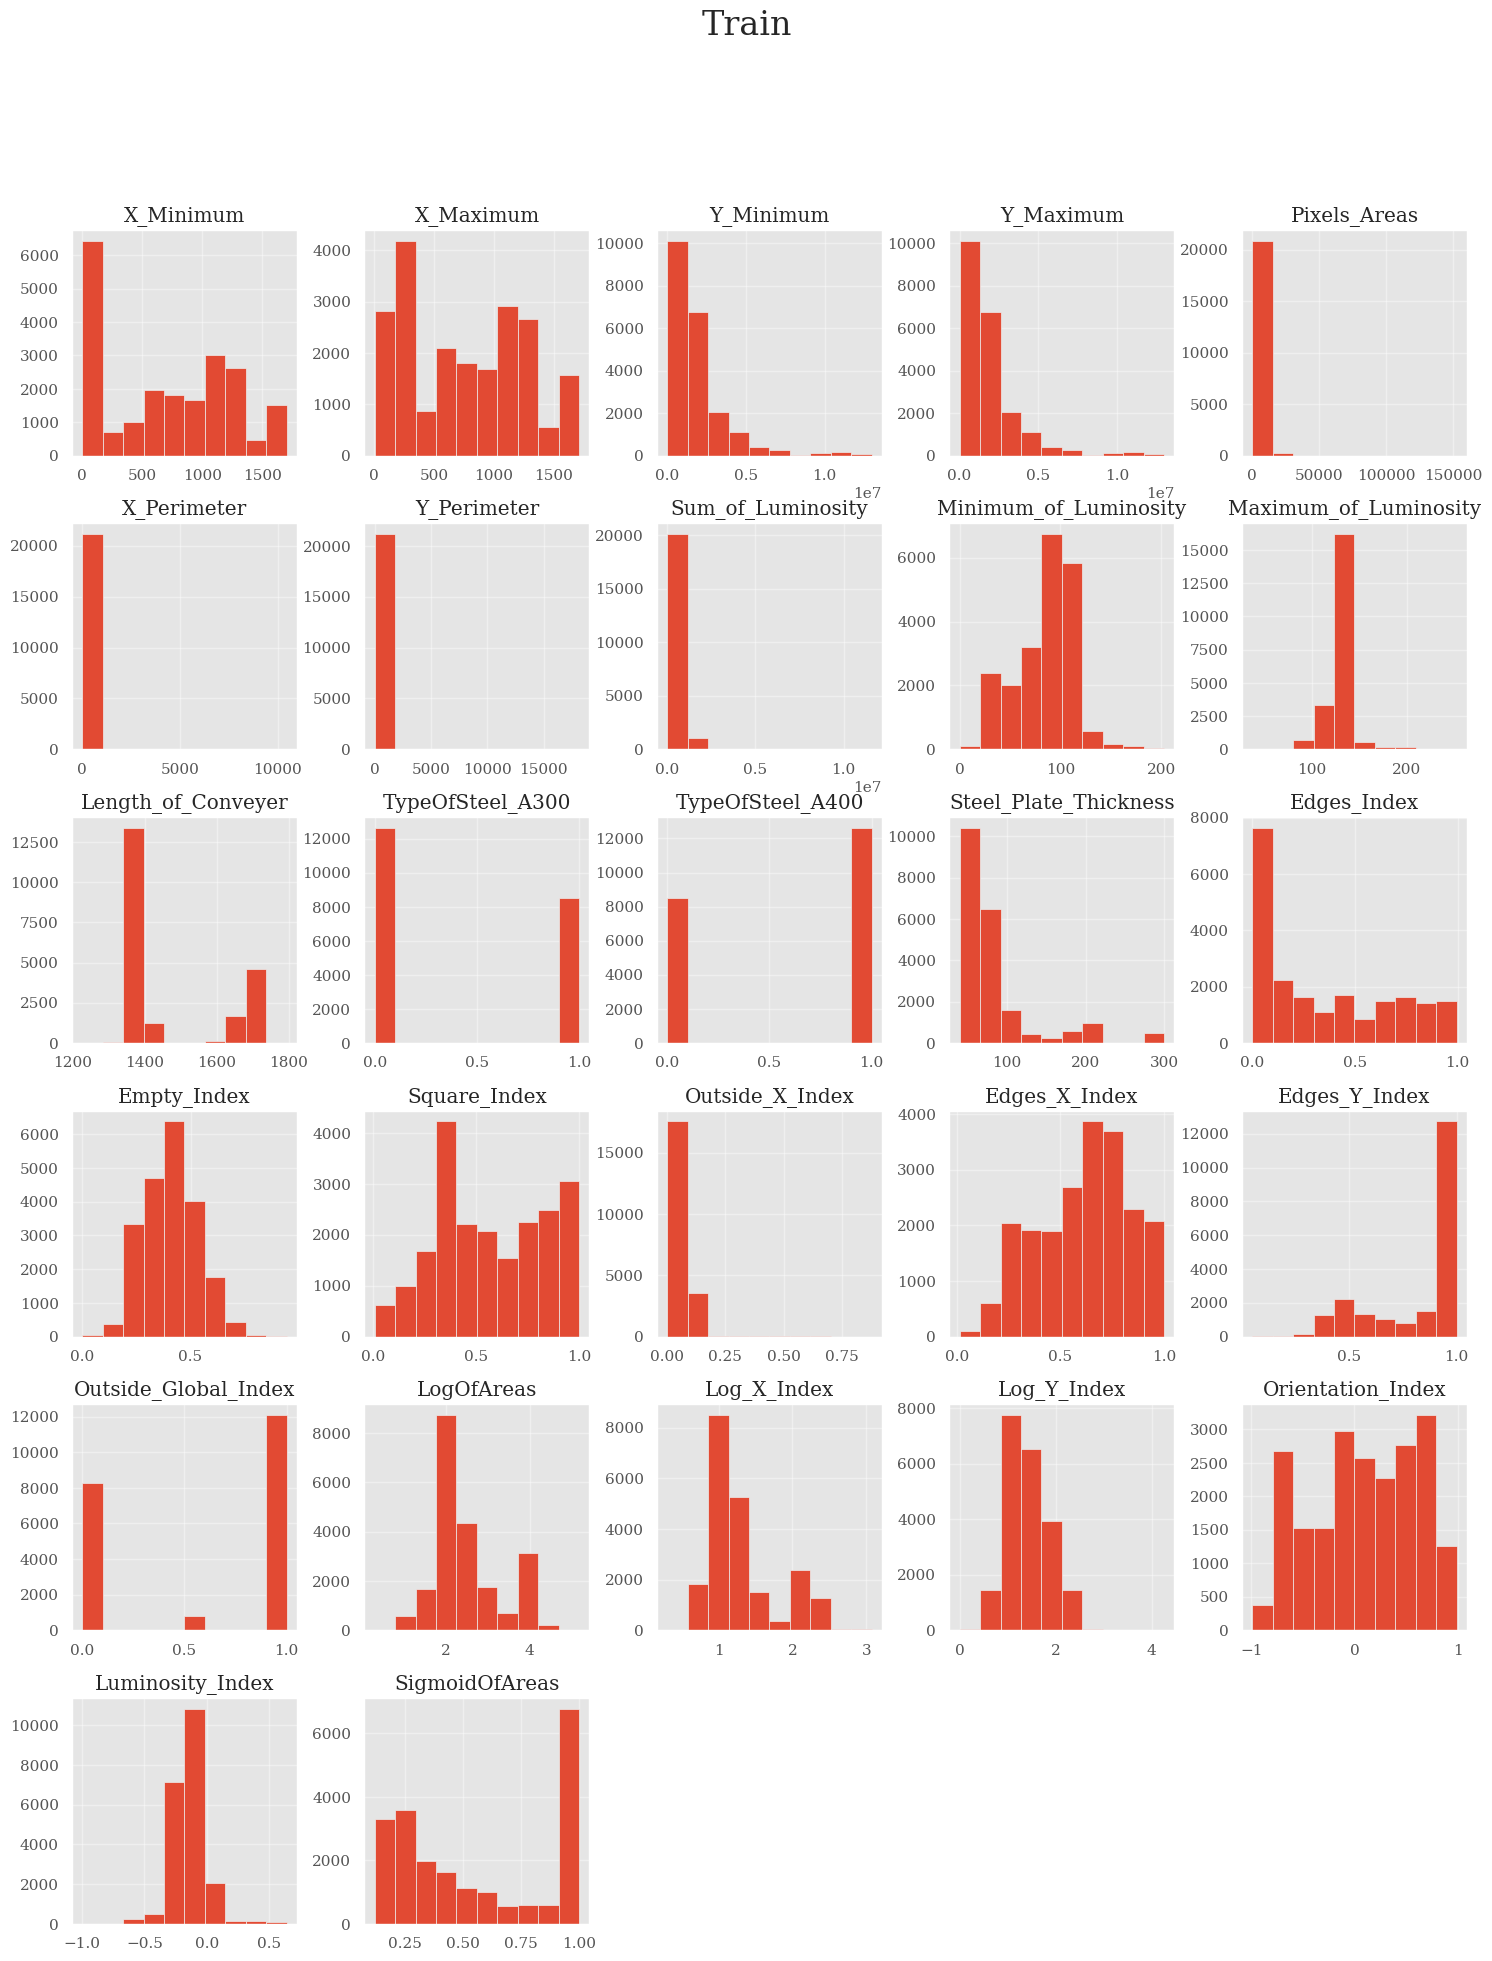

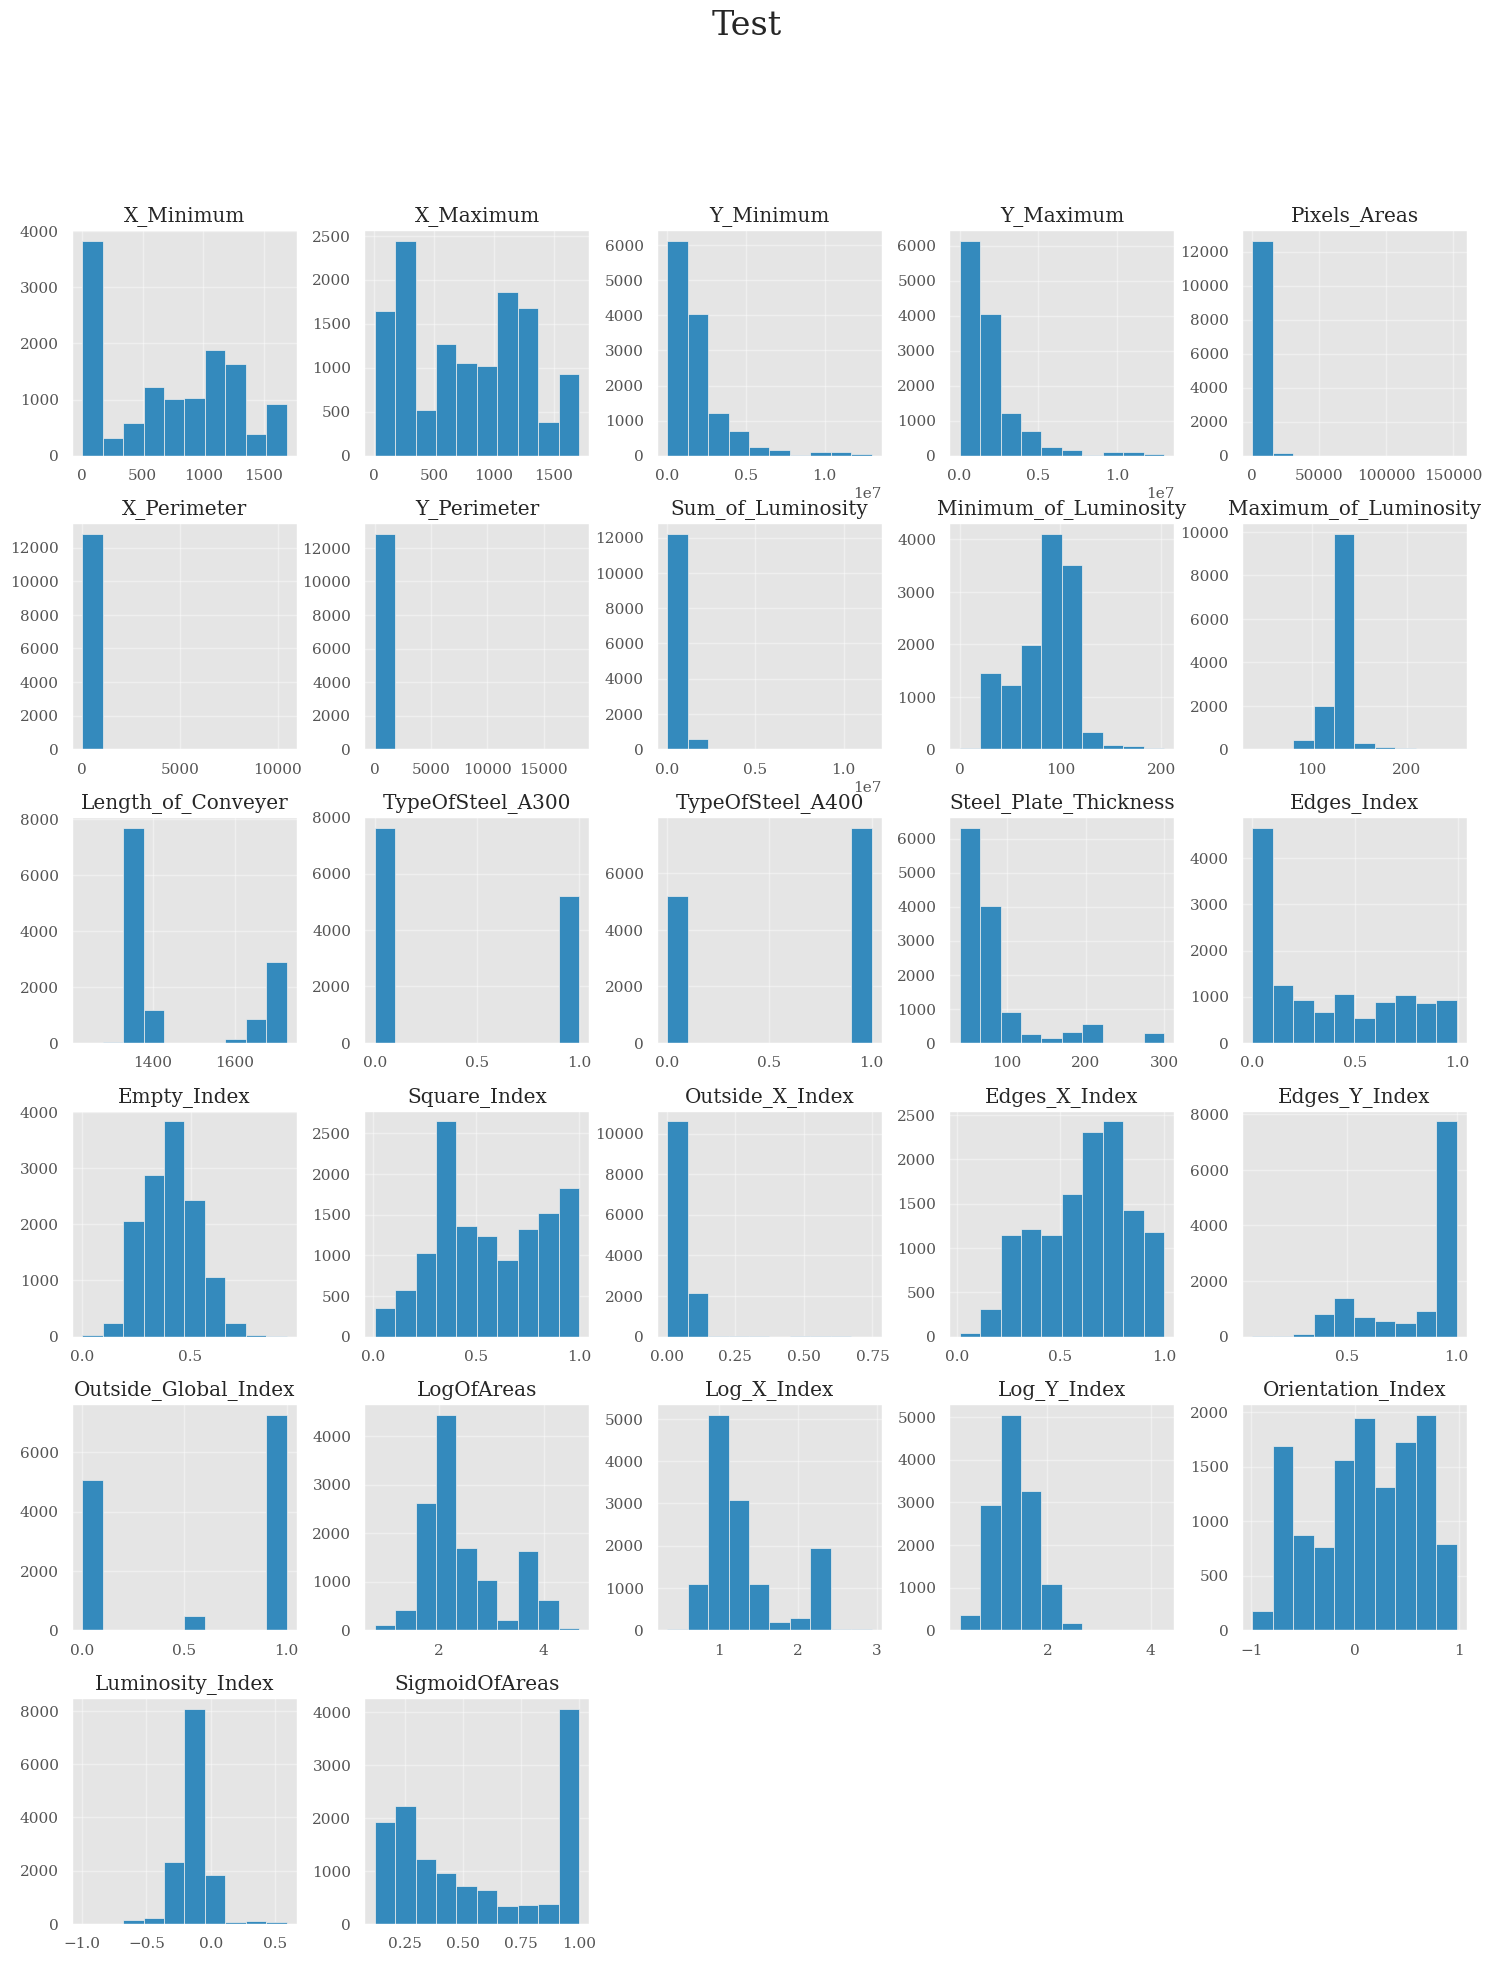

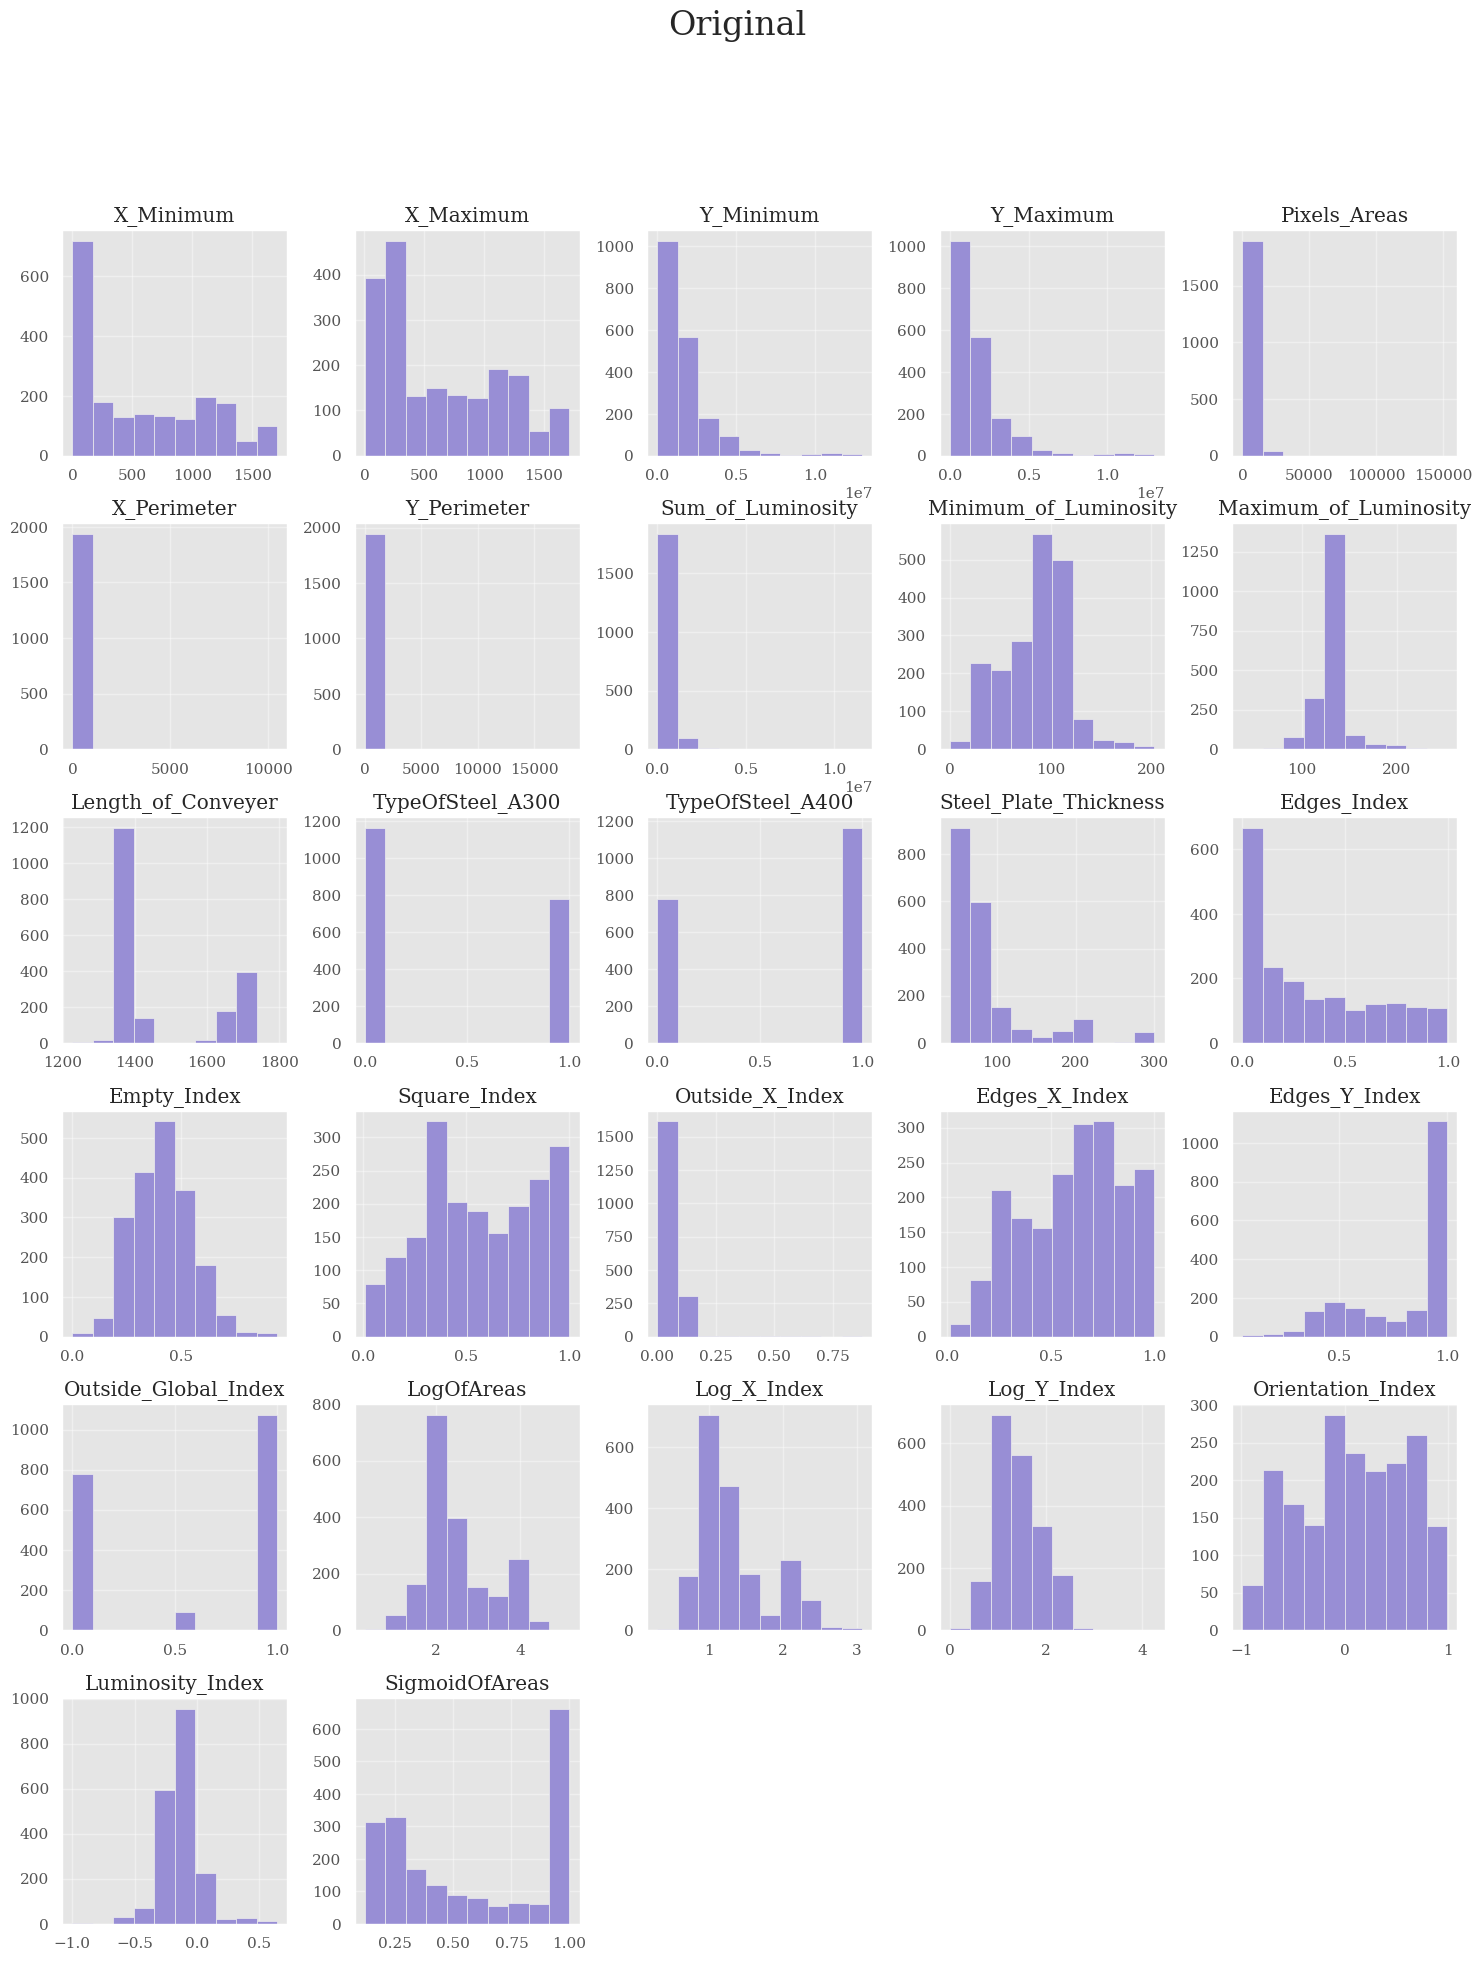

In [9]:
for i, df in enumerate([Cfg.train, Cfg.test, Cfg.orig]):
    try:
        ax = df.drop(Cfg.targets, axis=1).hist(figsize=(18, 22), color=color_pal[i])
        plt.suptitle(df.name, fontsize=24)
    except:
        ax = df.hist(figsize=(18, 22), color=color_pal[i])
        plt.suptitle(df.name, fontsize=24)

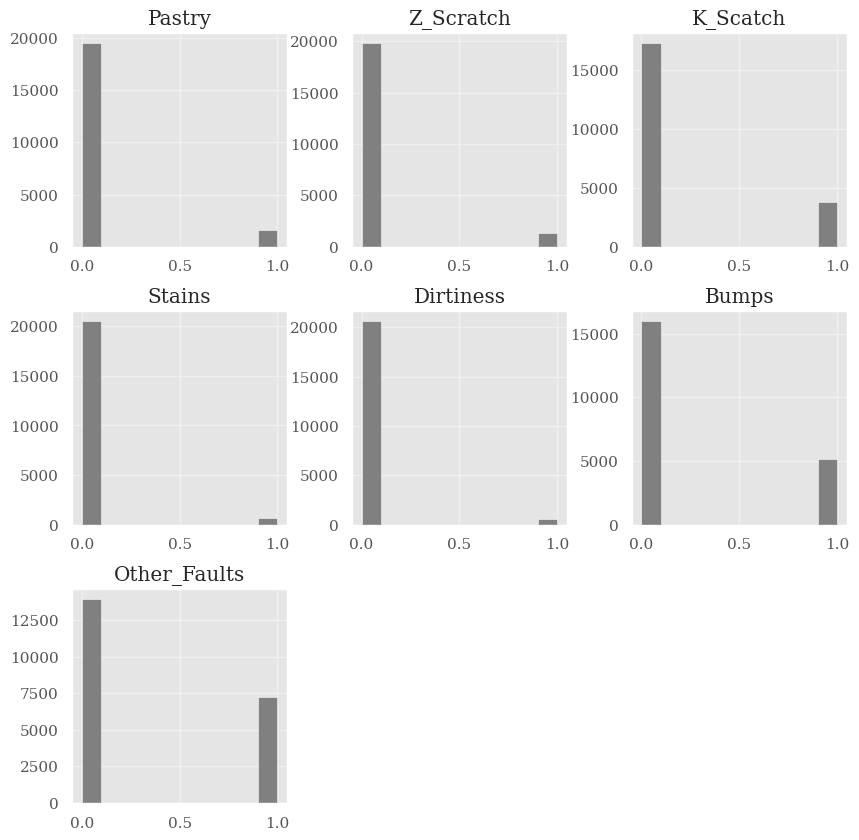

In [10]:
Cfg.targets_bin.hist(figsize=(10, 10), color='Grey');

In [11]:
if Cfg.perform_adversarial_validation:
    X_adv_val =  pd.concat([Cfg.train, Cfg.test], axis=0)
    y_adv_val = [0] * len(Cfg.train) + [1] * len(Cfg.test)

    model = RandomForestClassifier(random_state=Cfg.state)
    cv_preds = cross_val_predict(model, X_adv_val, y_adv_val, cv=5, n_jobs=-1, method='predict_proba')

    score = roc_auc_score(y_true=y_adv_val, y_score=cv_preds[:,1])
    if score > 0.4 and score < 0.6:
        print(f"Train and test data likely belong to the same distribution (ROC_AUC={score:0.3f})")
    else:
        print(f"Train and test data likely belong to different distributions (ROC_AUC={score:0.3f})")

Train and test data likely belong to the same distribution (ROC_AUC=0.498)


## Feature engineering

In [12]:
# https://www.kaggle.com/code/lucamassaron/steel-plate-eda-xgboost-is-all-you-need
def calculate_ranges(data):
    data['X_Range'] = data['X_Maximum'] - data['X_Minimum']
    data['Y_Range'] = data['Y_Maximum'] - data['Y_Minimum']
    data['Luminosity_Range'] = data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity']
    return data

def calculate_size_ratio_features(data):
    data['Area_Perimeter_Ratio'] = data['Pixels_Areas'] / (data['X_Perimeter'] + data['Y_Perimeter'])
    return data

train = calculate_size_ratio_features(calculate_ranges(Cfg.train))
test = calculate_size_ratio_features(calculate_ranges(Cfg.test))

In [13]:
if Cfg.scale_data:
    if Cfg.scaling_type == 'StandardScaler':
        scaler = StandardScaler()
    elif Cfg.scaling_type == 'RobustScaler':
        scaler = RobustScaler()
    elif Cfg.scaling_type == 'MinMaxScaler':
        scaler = MinMaxScaler()

    train = scaler.fit_transform(train)
    test = scaler.transform(test)

In [14]:
# https://www.kaggle.com/code/lucamassaron/steel-plate-eda-xgboost-is-all-you-need
train.reset_index(drop=True, inplace=True)
target = Cfg.targets_bin @ (np.arange(Cfg.targets_bin.shape[1]) + 1)
target[Cfg.targets_bin.sum(axis=1) == 2] = 3
target.reset_index(drop=True, inplace=True)

In [15]:
## XGBoost
k_fold = KFold(n_splits=3, shuffle=True, random_state=Cfg.state)

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'device': 'cpu'
    }

    # Fit the model
    model_XGB_opt = XGBClassifier(**params)
    multi_output_model_xgb = MultiOutputClassifier(model_XGB_opt)
    score = cross_val_score(multi_output_model_xgb, train, Cfg.targets_bin,
                            n_jobs=-1, cv=k_fold, scoring='roc_auc').mean()
    return score

# study_xgb = optuna.create_study(direction="maximize")
# study_xgb.optimize(objective, n_trials=100)

In [16]:
# xgb_params = study_xgb.best_params
xgb_params = {'max_depth': 5, 'learning_rate': 0.018096402149708857, 'n_estimators': 566, 'min_child_weight': 9, 'gamma': 0.42318445852396946, 'subsample': 0.9732026812334615, 'colsample_bytree': 0.28503859903848755, 'reg_alpha': 4.319862839190787e-07, 'reg_lambda': 6.403707740783699e-05}

xgb_params['objective'] = 'multi:softmax'
xgb_params['num_class'] = len(Cfg.targets)
xgb_params['verbosity'] = 0

In [17]:
lgbm_params = {'n_estimators': 558, 'learning_rate': 0.0069456004724621915, 'max_depth': 10, 'num_leaves': 31, 'subsample': 0.7614208785414255, 'colsample_bytree': 0.4407209765043587, 'colsample_bynode': 0.9294179777950677, 'reg_alpha': 0.32333606762497746, 'reg_lambda': 1.3330951722028232e-07, 'min_split_gain': 6.063633748443254e-06}
lgbm_params['boosting_type'] = 'gbdt'
lgbm_params['objective'] = 'multiclass'
lgbm_params['verbose'] = -1
lgbm_params['n_jobs'] = -1

In [18]:
# https://www.kaggle.com/code/lucamassaron/steel-plate-eda-xgboost-is-all-you-need
cv = StratifiedKFold(5, shuffle=True, random_state=Cfg.state)
cv_splits = cv.split(train, y=target)
roc_auc_scores = []

for train_idx, val_idx in cv_splits:
    
    xgb = XGBClassifier(**xgb_params)

    X_train_fold, X_val_fold = train.iloc[train_idx], train.iloc[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]
    
    xgb.fit(X_train_fold, y_train_fold)
    
    y_val_prob = xgb.predict_proba(X_val_fold)
    # We compute the validation score on the original multilabel targets
    roc_auc = roc_auc_score(Cfg.targets_bin.iloc[val_idx], y_val_prob[:, 1:], multi_class='ovr')
    
    roc_auc_scores.append(roc_auc)

# Calculate the ROC AUC score statistics across all folds
roc_auc_mean = np.mean(roc_auc_scores)
roc_auc_std = np.std(roc_auc_scores)
roc_auc_max = np.max(roc_auc_scores)
roc_auc_min = np.min(roc_auc_scores)

print(f'Cross-validated ROC-AUC score: {roc_auc_mean:.3f} +/- {roc_auc_std:.3f}')
print(f'Max ROC-AUC score: {roc_auc_max:.3f}')
print(f'Min ROC-AUC score: {roc_auc_min:.3f}')

Cross-validated ROC-AUC score: 0.898 +/- 0.002
Max ROC-AUC score: 0.901
Min ROC-AUC score: 0.896


In [19]:
# https://www.kaggle.com/code/lucamassaron/steel-plate-eda-xgboost-is-all-you-need
xgb = XGBClassifier(**xgb_params)
xgb.fit(train, target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.28503859903848755, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.42318445852396946,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.018096402149708857,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=566, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [20]:
# https://www.kaggle.com/code/lucamassaron/steel-plate-eda-xgboost-is-all-you-need
cv = StratifiedKFold(5, shuffle=True, random_state=Cfg.state)
cv_splits = cv.split(train, y=target)
roc_auc_scores = []

for train_idx, val_idx in cv_splits:
    
    lgbm = LGBMClassifier(**lgbm_params)

    X_train_fold, X_val_fold = train.iloc[train_idx], train.iloc[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]
    
    lgbm.fit(X_train_fold, y_train_fold)
    
    y_val_prob = lgbm.predict_proba(X_val_fold)
    # We compute the validation score on the original multilabel targets
    roc_auc = roc_auc_score(Cfg.targets_bin.iloc[val_idx], y_val_prob[:, 1:], multi_class='ovr')
    
    roc_auc_scores.append(roc_auc)

# Calculate the ROC AUC score statistics across all folds
roc_auc_mean = np.mean(roc_auc_scores)
roc_auc_std = np.std(roc_auc_scores)
roc_auc_max = np.max(roc_auc_scores)
roc_auc_min = np.min(roc_auc_scores)

print(f'Cross-validated ROC-AUC score: {roc_auc_mean:.3f} +/- {roc_auc_std:.3f}')
print(f'Max ROC-AUC score: {roc_auc_max:.3f}')
print(f'Min ROC-AUC score: {roc_auc_min:.3f}')

Cross-validated ROC-AUC score: 0.899 +/- 0.002
Max ROC-AUC score: 0.902
Min ROC-AUC score: 0.896


In [21]:
xgb_preds = xgb.predict_proba(test.values)
lgbm_preds = lgbm.predict_proba(test)

In [22]:
final_preds = (xgb_preds + lgbm_preds) / 2
final_preds

array([[2.28670621e-02, 5.15745218e-01, 3.25404058e-03, ...,
        1.96099902e-02, 1.45911330e-01, 2.83460983e-01],
       [2.83322195e-02, 3.25296902e-01, 2.36225583e-02, ...,
        1.51739826e-01, 1.43715972e-01, 3.14289168e-01],
       [6.19994114e-02, 4.29461868e-03, 3.48219864e-02, ...,
        8.44087591e-03, 3.04490755e-01, 5.49357720e-01],
       ...,
       [1.57224118e-02, 8.54050232e-04, 9.14324291e-04, ...,
        5.42835704e-04, 2.10682866e-03, 5.04166462e-02],
       [3.70145397e-02, 4.21938316e-01, 1.12243252e-02, ...,
        5.20897932e-02, 1.34736862e-01, 3.20282631e-01],
       [1.92501664e-02, 2.09811725e-03, 4.14144784e-03, ...,
        8.27202775e-04, 4.48041221e-03, 7.28751177e-02]])

In [23]:
submission = Cfg.sample
submission.iloc[:, 1:] = final_preds[:, 1:]
submission.to_csv("submission.csv", index=False)
assert len(submission) == 12814

In [24]:
submission.head().style.format(precision=5)

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.51575,0.00325,0.00844,0.00071,0.01961,0.14591,0.28346
1,19220,0.32530,0.02362,0.01203,0.00097,0.15174,0.14372,0.31429
2,19221,0.00429,0.03482,0.03511,0.00149,0.00844,0.30449,0.54936
3,19222,0.16020,0.00987,0.00409,0.00208,0.01207,0.39652,0.39083
4,19223,0.00327,0.00727,0.00380,0.00197,0.00524,0.61000,0.33802
